# Extract Morse Code tones from a .wav file

Source at https://github.com/dmaust/MorseCodeDecoder

In [1]:
from pylab import plot, hist, ylim
from scipy.fftpack import fft, fftfreq
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
from scipy.io import wavfile
fs, data = wavfile.read('morse-code.wav')

In [ ]:
import IPython
IPython.display.Audio("morse-code.mp3")

## Identify the frequency with the highest amplititude on an FFT.

In [5]:
#Assume 48kHz sampling

def max_freq(data):
    ind = np.argmax(abs(fft(data)))
    return fftfreq(len(data), 1/48000.)[ind]

max_freqs = np.array([max_freq(data[ind:ind+2000]) for ind in range(0, data.shape[0],100)])
# pd.rolling_apply(data[:], 4000, max_freq)

## Histogram of max frequencies

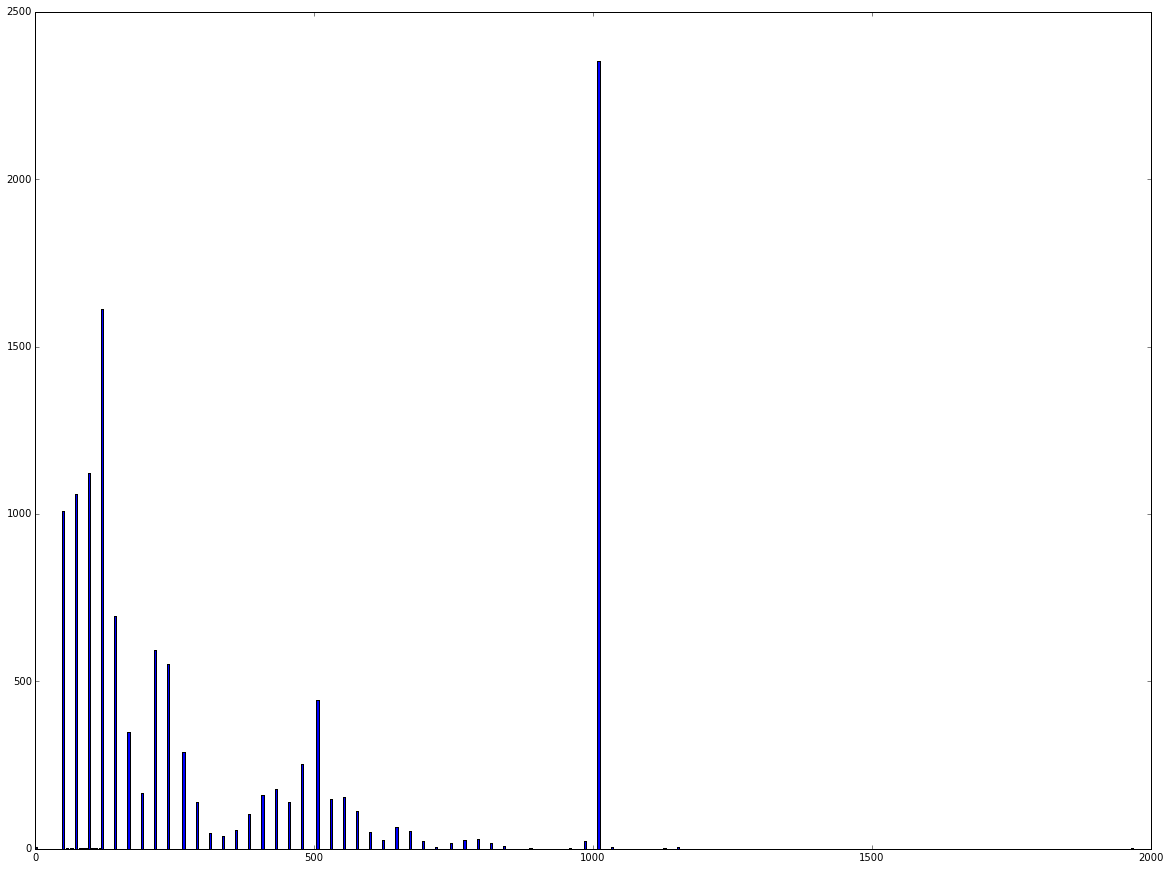

In [6]:
from pylab import figure
figure(figsize=(20,15))
hist(max_freqs[max_freqs < 2000], bins=500)
None

## Label Tones as max freq between 975 Hz and 1050 Hz

In [7]:
from pylab import hist
tones = (max_freqs > 975.) & (max_freqs < 1050.)

In [8]:
tones = pd.rolling_mean(tones, 3) > 0.5

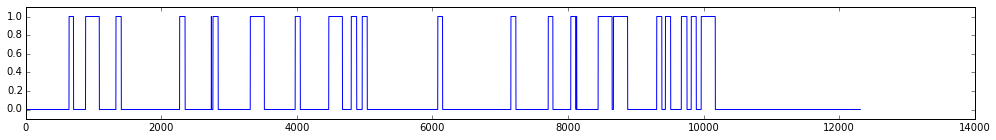

In [9]:
figure(figsize=(17,2))
ylim(-0.1, 1.1)
plot(tones)
None

## Label tones and spaces 

Spaces as "False"  tones as "True". Record times corresponding to each.

In [10]:
state=False

start_state = 0

transitions = []
times = []
for i, tone in enumerate(tones):
    if state != tone:
        transitions.append(state)
        times.append(i - start_state)
        start_state = i
    state = tone

## Histogram of Tone lengths

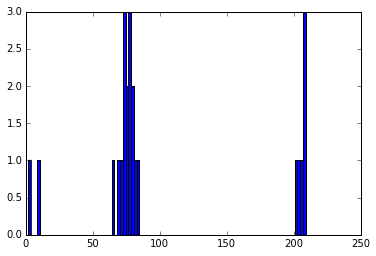

In [11]:
hist(np.array(times)[np.where(np.array(transitions))], bins=100)
None

## Histogram of Space lengths

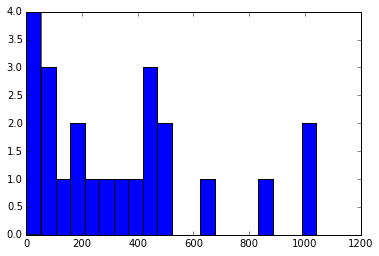

In [12]:
hist(np.array(times)[np.where(~np.array(transitions))], bins=20)
None

## Sequence of Tones and Spaces with their timing

In [13]:

for trans, time in zip(transitions,times):
    print trans,time

False 636
True 66
False 178
True 203
False 245
True 79
False 861
True 81
False 387
True 2
False 22
True 77
False 474
True 207
False 456
True 75
False 420
True 202
False 130
True 80
False 82
True 74
False 1041
True 71
False 1008
True 74
False 477
True 69
False 264
True 77
False 2
True 9
False 316
True 206
False 20
True 209
False 429
True 76
False 53
True 77
False 158
True 83
False 63
True 74
False 73
True 208


## Attempt decoding

Write detected . and - spaced out by timing (space = 8000 samples). ! indicates an anomalous tone.

In [14]:
s = ""
for trans, time in zip(transitions,times):
    label = ''
    if trans and time > 50 and time < 100:
        label = '.'
    elif trans and time > 190 and time < 250:
        label = '-'
    elif not trans:
        for _ in range(0, int(round(time/80.))):
            s += ' '
    else:
        s += "!"
    s += label
    
print s

        .  -   .           .     !.      -      .     -  . .             .             .      .   .!    --     . .  . . -


## Attemping to segment into characters

```
.  -   .  R    
.     !.      -  U   
.     -  . .   L      
.  E       
.      .   .!    -- 3  
. .  . . - 4
```

RULE34

